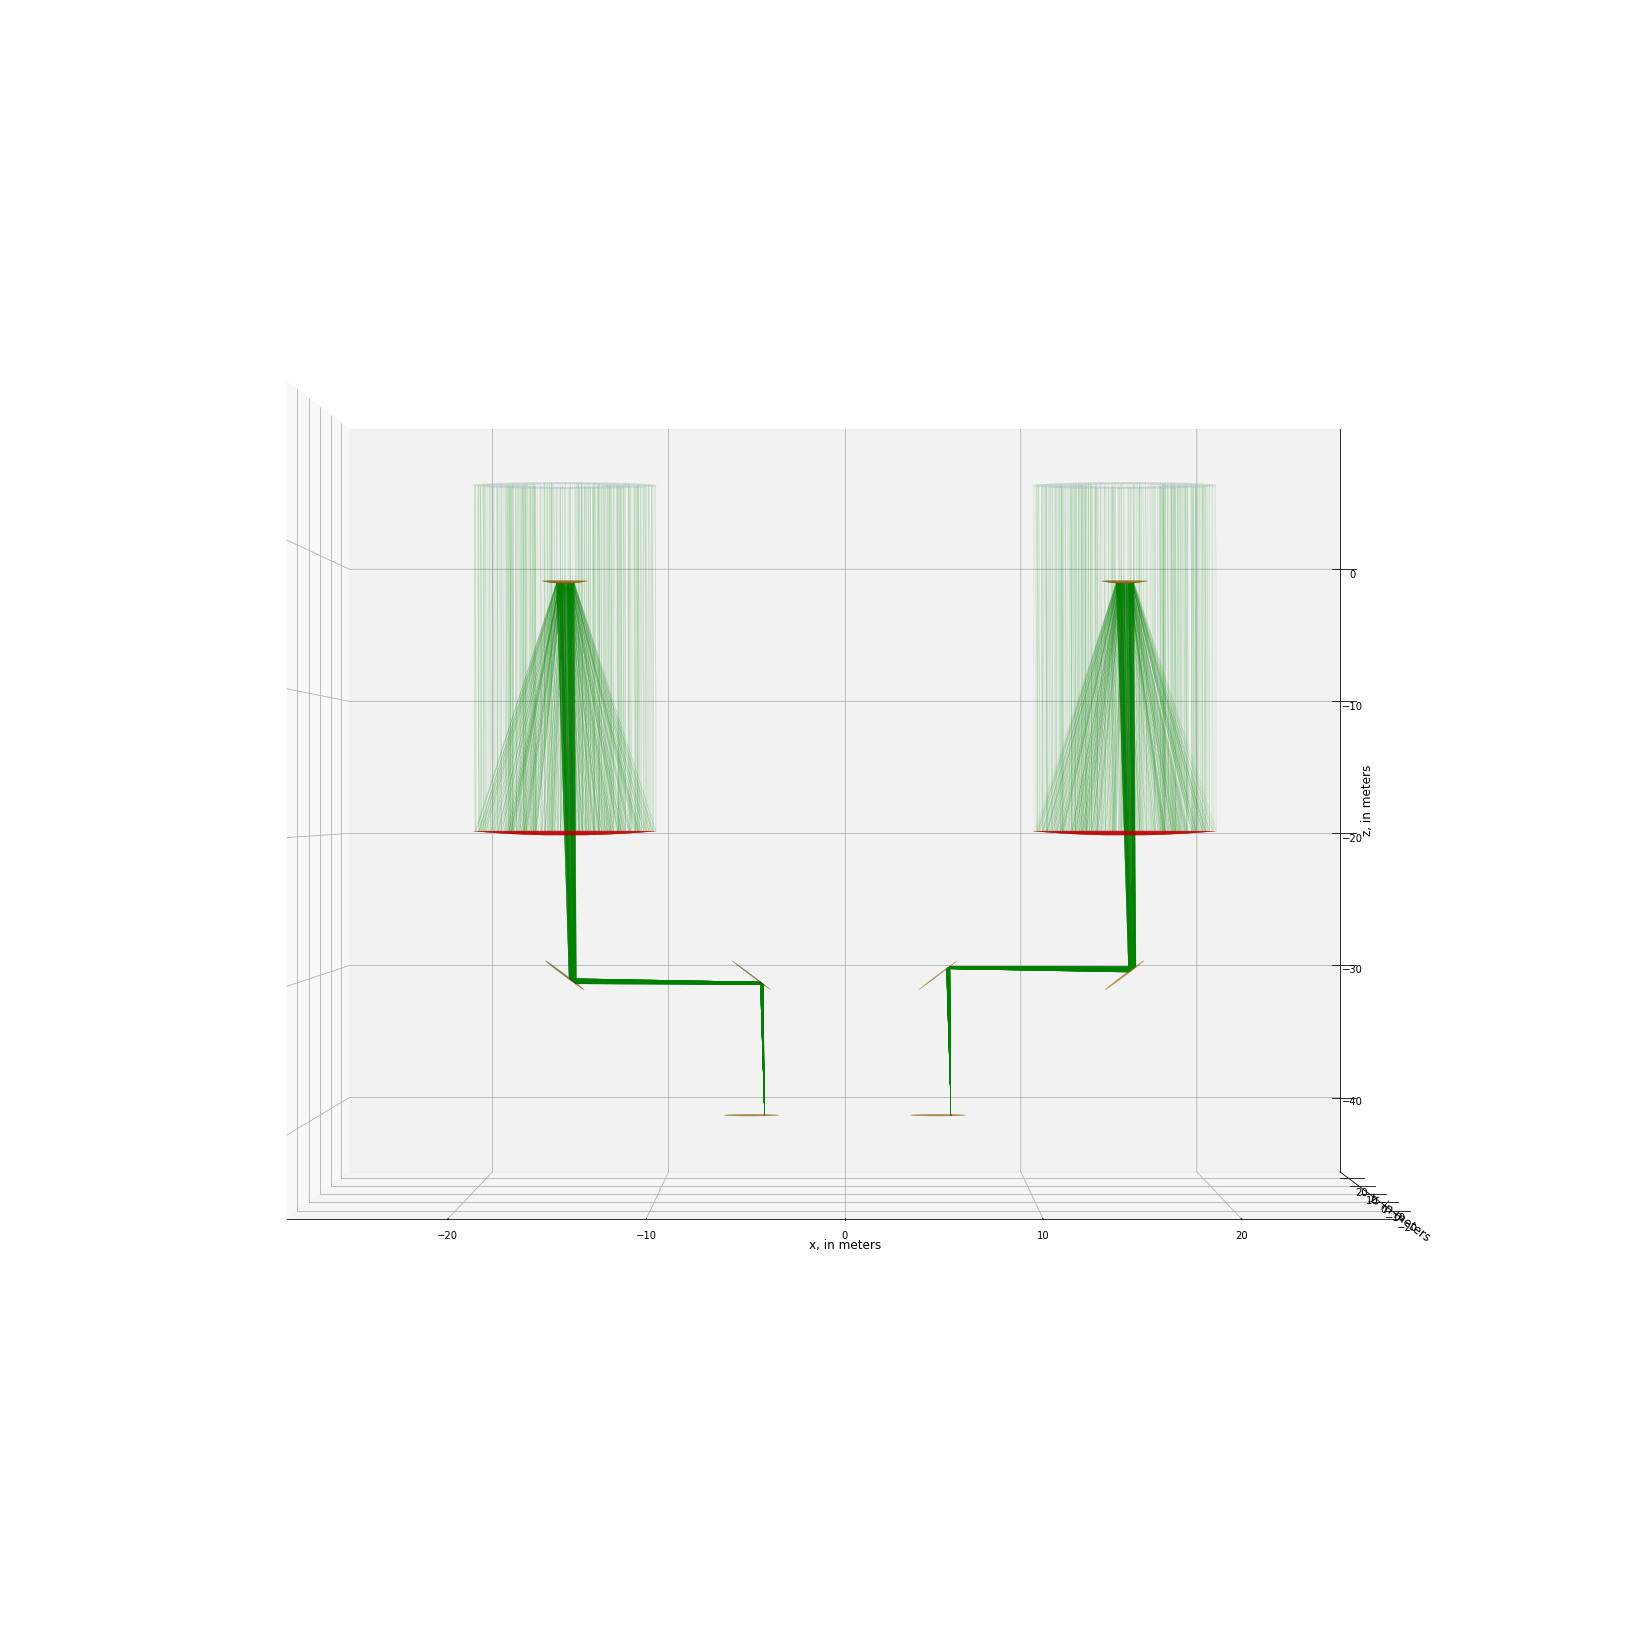

In [321]:
import pimms.optics as op
import copy
reload(op)
m0=op.SymmetricQuadricMirror(4., 10.,  f=np.inf, g=np.inf, b=(-1,-1),p=(0,0,5))
m1=op.SymmetricQuadricMirror(2., 10.,  f=20.,    g=np.inf, b=(1,1))
m2=op.SymmetricQuadricMirror(0.,  2.5, f=2.,     g=-48,    b=(1,1))
m3=op.SymmetricQuadricMirror(0.,  3.,  f=np.inf, g=np.inf, b=(1,1), p=(0,0,-30), q=op.quat.from_angles(0., np.pi/4.))
m4=op.SymmetricQuadricMirror(0.,  3.,  f=np.inf, g=np.inf, b=(1,1), p=(-10.,0,-30.), q=op.quat.from_angles(0., np.pi/4.))
d1=op.SymmetricQuadricMirror(0.,  3.,  f=np.inf, g=np.inf, b=(0,0), p=(-10,0,-40))
m0.is_virtual=True
m0.is_entrance=True
m1.is_primary=True
assembly=op.OpticalAssembly()
assembly.add_part(m0)
assembly.add_part(m1)
assembly.add_part(m2)
assembly.add_part(m3)
assembly.add_part(m4)
assembly.add_part(d1)
new_assembly=copy.deepcopy(assembly)
assembly.move([15,0,0])
new_assembly.rotate(op.quat.from_angles(np.pi, 0.))
new_assembly.move([-15,0,0])
assembly.join(new_assembly)
del new_assembly
s=op.LightSource((np.pi,np.deg2rad(5./60.),np.inf))
p,q=s(assembly.get_entrance(), 500, 1e-3)
trace,seq=assembly.trace(q,steps=6)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
trigs,zs,extent=assembly.draw(axes=ax,draw_virtual=True,raytrace=trace,view_angles=(0, -90))

